In [2]:
# Checking tensorflow version
import tensorflow as tf 
tf.__version__

'2.19.0'

In [3]:
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits between 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Unpacks the data 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


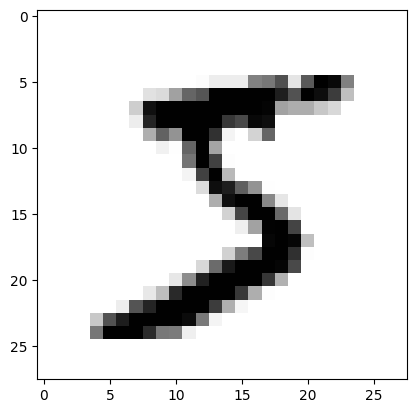

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary) # cmap = plt.cm.binary is a grayscale color map
plt.show()
# print(x_train[0]) # this shows the pixel values of the image

In [16]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

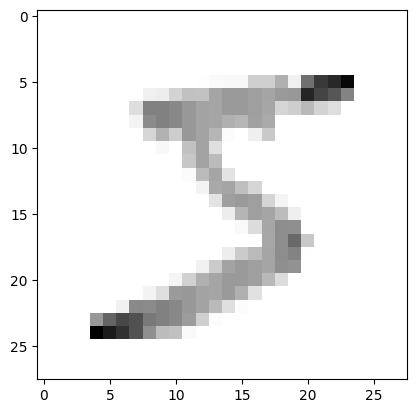

In [ ]:
# From above, we can see that the image has a 0 - 255 pixel scale. To minimise this scale (between 0 and 1), we can provide 
# it with a range using the normalize function.

x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalizes the data
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalizes the data
plt.imshow(x_train[0], cmap=plt.cm.binary) # We can see by scaling down our pixel range, some areas of the image are lighter, making it easier for the model to learn
print(x_train[0])

## Building the CNN Model

In [ ]:
# Model base/creation
model = tf.keras.models.Sequential() # Sequential model is a linear stack of layers - it is the most common one
model.add(tf.keras.layers.Flatten()) # Flattening the 28x28 images into a single array of 784 pixels

# Creating layers for the model
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # This is what will make a neuron fire. 'relu' = rectified linear 
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Adding an output layer with 10 neurons (one for each digit) and softmax activation function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Compiling the model with adam optimizer and sparse categorical crossentropy loss function
model.fit(x_train, y_train, epochs=3) # Training the model for 3 epochs